In [89]:
import  keras
from  keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

(128, 40) nozyczki_audacity-1.wav
(128, 40) nozyczki_audacity-10.wav
(128, 40) nozyczki_audacity-11.wav
(128, 40) nozyczki_audacity-12.wav
(128, 40) nozyczki_audacity-13.wav
(128, 40) nozyczki_audacity-14.wav
(128, 40) nozyczki_audacity-15.wav
(128, 40) nozyczki_audacity-16.wav
(128, 40) nozyczki_audacity-17.wav
(128, 40) nozyczki_audacity-18.wav
(128, 40) nozyczki_audacity-19.wav
(128, 40) nozyczki_audacity-2.wav
(128, 40) nozyczki_audacity-20.wav
(128, 34) nozyczki_audacity-3.wav
(128, 34) nozyczki_audacity-4.wav
(128, 34) nozyczki_audacity-5.wav
(128, 40) nozyczki_audacity-6.wav
(128, 40) nozyczki_audacity-7.wav
(128, 40) nozyczki_audacity-8.wav
(128, 40) nozyczki_audacity-9.wav


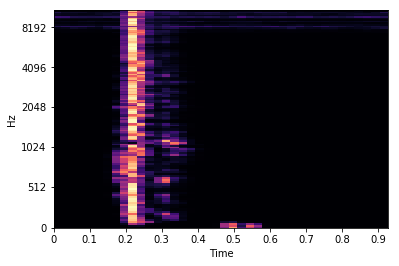

In [2]:
scissors = []
for file in os.listdir("nozyczki_pojedyncze/"):
##'nozyczki_pojedyncze/nozyczki_audacity-1.wav'
    y, sr = librosa.load(os.path.join("nozyczki_pojedyncze/", file))
    scissors.append(y)
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    print(ps.shape,file,)
    librosa.display.specshow(keras.utils.normalize(ps,axis=-1,order=2), y_axis='mel', x_axis='time')

In [4]:
#clear, sr = librosa.load("Tame_Impala_Let_It_Happen.wav")
clear=[]
for folder in ["muzyka"]:
    for file in os.listdir(folder):
        if(".wav" in file):
            probes,sr = librosa.load(folder+"/"+file)
            clear.extend(probes)
            print(file,len(clear))
clear=np.array(clear)
print("done")

Apocalyptica- Bittersweet .wav 4484736
Iron Maiden - Wasting love (Nicolas Mussi remix) www.eNutka.net.wav 5841792
muzyka-01.wav 8979840
muzyka-02.wav 12062592
muzyka-03.wav 13499136
Tame_Impala_Let_It_Happen.wav 19153728
done


In [5]:
addition = np.array(1)
addition = np.append(addition,scissors[random.randint(0,19)])
clear_len = len(clear)
while(len(addition)<clear_len):
    addition = np.append(addition,scissors[random.randint(0,19)])
print(len(addition))
noise = addition[0:len(clear)]+clear
librosa.output.write_wav('muzyka_szum.wav', noise, sr) 

19154411


In [6]:
def saving_spectograms(array,sr,ln,file,ok):
    if(ok):
        folder = "ok"
    else:
        folder = "nok"
    #plt.figure()
    data = []
    i=0
    for probe in array:
        ps = librosa.feature.melspectrogram(y=probe, sr=sr,hop_length=ln)
        #print(ps.shape)
        np.save(folder+"/spectogram_"+file+"{0}".format(i),ps)
        data.append(ps)
        #librosa.display.specshow(ps)
        #plt.savefig(folder+"/spectogram_"+file+"{0}".format(i))
        i+=1
    print("Stworzono {0} spektogramów do folderu {1}".format(i,folder))
    return data

In [7]:
def sampling_for_spectograms(array,samples_full):
    array_reshaped = np.array([array[i*samples_full:(i+1)*samples_full] for i in range(len(array)//samples_full)])
    print(array_reshaped.shape)
    return array_reshaped

In [8]:
def music_to_spectograms(music,row_samples,full_samples,sr,ok,file="zwykly"):
    #reshaping
    music_reshaped = sampling_for_spectograms(music,full_samples)
    final = np.array(saving_spectograms(music_reshaped,sr,row_samples,file,ok))
    return final    

In [29]:
print(noise.shape,clear.shape)
time_duration = 20 ##ms
samples_for_spectogram = int(0.001*time_duration*sr*128)
print("we need {0} samples for {1} ms. spectogram 128x128 nedd {2}".format(0.001*time_duration*sr,time_duration,samples_for_spectogram))
ok = music_to_spectograms(clear,442,samples_for_spectogram,sr,True)
nok = music_to_spectograms(noise,442,samples_for_spectogram,sr,False)
print(ok.shape)

(19153728,) (19153728,)
we need 441.0 samples for 20 ms. spectogram 128x128 nedd 56449
(339, 56449)
Stworzono 339 spektogramów do folderu ok
(339, 56449)
Stworzono 339 spektogramów do folderu nok
(339, 128, 128)


# Data augmentation #not working

In [31]:
#time streching
for strech in [0.81,1.07]:
    ok = music_to_spectograms(librosa.effects.time_stretch(clear, rate=strech),442,samples_for_spectogram,sr,True,file="time_strech_{0}".format(strech))
    nok = music_to_spectograms(librosa.effects.time_stretch(noise, rate=strech),442,samples_for_spectogram,sr,False,file="time_strech_{0}".format(strech))
print("done")

(167, 56448)
Stworzono 167 spektogramów do folderu ok
(167, 56448)
Stworzono 167 spektogramów do folderu nok
(126, 56448)
Stworzono 126 spektogramów do folderu ok
(126, 56448)
Stworzono 126 spektogramów do folderu nok
done


In [32]:
#Pich shift and vary
for n in [-1,-2,2,1,-2.5, -3.5, 2.5, 3.5]:
    ok = music_to_spectograms(librosa.effects.pitch_shift(clear,sr,n_steps=n),442,samples_for_spectogram,sr,True,file="wary_pich{0}".format(n))
    nok = music_to_spectograms(librosa.effects.pitch_shift(noise,sr,n_steps=n),442,samples_for_spectogram,sr,False,file="wary_pich_{0}".format(n))
print("done")

(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
done


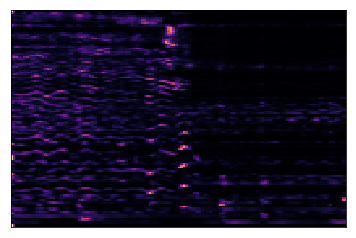

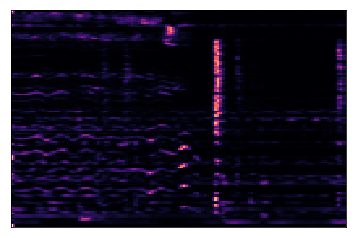

In [13]:
#data searching
plt.figure()

for file in ["ok/spectogram_zwykly19.npy","nok/spectogram_zwykly19.npy"]:
    spectogram = np.load(file)
    librosa.display.specshow(keras.utils.normalize(spectogram,axis=-1,order=2))
    plt.savefig("spektogramy/"+file[0:-4])
    plt.show()

# Data preapering

In [14]:
D = [] # Dataset
for folder in ["ok","nok"]:
    for file in os.listdir(folder):
        spectogram = np.load(folder+"/"+file)
        if spectogram.shape != (128, 128): continue
        D.append( (keras.utils.normalize(spectogram,axis=-1,order=2), folder) )
print(len(D),"done")

678 done


In [15]:
dataset = D
print(len(D))
print(len(D[0]))
print(len(D[0][0]))
random.shuffle(dataset)

train = dataset[:600]
test = dataset[600:]

x_train, y_train = zip(*train)
x_test, y_test = zip(*test)

# Reshape for CNN input
x_train = np.array([x.reshape( (128, 128, 1) ) for x in x_train])
x_test = np.array([x.reshape( (128, 128, 1) ) for x in x_test])

# One-Hot encoding for classes
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
print(y_test)

678
2
128
[0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0
 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0
 0 1 1 0]


In [16]:
Tensor_board = keras.callbacks.TensorBoard(log_dir='./logs')

In [17]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(1, activation='sigmoid'))

In [15]:
model.load_weights('my_model_weights_53.h5')

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          epochs=50,
          batch_size=128,
          callbacks = [Tensor_board])

score = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
## tensorboard --logdir C:\Users\Jakub\praca_inzynierska\Scissors_falling\logs --port=8080

Epoch 1/50
600/600 [==============================] - 39s 65ms/step - loss: 0.6901 - acc: 0.5400
Epoch 2/50
600/600 [==============================] - 39s 65ms/step - loss: 0.7040 - acc: 0.4983
Epoch 3/50
600/600 [==============================] - 39s 65ms/step - loss: 0.6912 - acc: 0.5250
Epoch 4/50
600/600 [==============================] - 39s 65ms/step - loss: 0.6773 - acc: 0.6150
Epoch 5/50
600/600 [==============================] - 39s 64ms/step - loss: 0.6644 - acc: 0.6133
Epoch 6/50
600/600 [==============================] - 38s 64ms/step - loss: 0.6209 - acc: 0.6617
Epoch 7/50
600/600 [==============================] - 39s 64ms/step - loss: 0.6093 - acc: 0.6617
Epoch 8/50
600/600 [==============================] - 36s 59ms/step - loss: 0.6050 - acc: 0.6717
Epoch 9/50
600/600 [==============================] - 36s 59ms/step - loss: 0.5878 - acc: 0.6717
Epoch 10/50
600/600 [==============================] - 36s 60ms/step - loss: 0.5669 - acc: 0.6917
Epoch 11/50
600/600 [========

In [19]:
model.save("model.h5")
model.save_weights('my_model_weights_80.h5')

In [20]:
print(history.history)

{'loss': [0.6901178590456645, 0.7040001527468364, 0.6912206482887268, 0.6773210628827413, 0.6643538562456767, 0.6208583919207254, 0.6093133656183879, 0.6049520421028137, 0.5877735575040182, 0.5669144018491109, 0.5568144567807516, 0.5418101541201273, 0.5274316302935282, 0.5306931201616923, 0.5150415142377217, 0.5113032849629721, 0.49016653656959536, 0.4660025799274445, 0.4701346723238627, 0.46498225649197894, 0.4546417558193207, 0.43871906995773313, 0.4196965471903483, 0.42246904810269675, 0.40818776925404865, 0.39526667873064675, 0.37792818586031596, 0.35218278765678407, 0.33361137231191, 0.30909526109695434, 0.3107068073749542, 0.3095741271972656, 0.315160950422287, 0.2928425351778666, 0.28925646901130675, 0.25862960815429686, 0.2538068147500356, 0.2564994490146637, 0.2611594577630361, 0.2550484351317088, 0.24565520286560058, 0.23937396287918092, 0.21557369947433472, 0.24564189652601878, 0.21539409041404725, 0.22006299336751303, 0.21336207389831544, 0.2242306896050771, 0.1991413933038

# Finding moment of falling 

In [94]:
moment=[]
for folder in ["test_moment"]:
    for file in os.listdir(folder):
        if("d_moment" in file):
            probes,sr = librosa.load(folder+"/"+file)
            moment.extend(probes)
            print(file,len(moment)/sr)
moment=np.array(moment)
print("done")
#we need 441.0 samples for 20 ms. spectogram 128x128 nedd 56448

30_Second_moment.wav 245.09410430839003
done


In [95]:
print(moment.shape)
hop_len = 442
prediction_x =[]
prediction_y =[]
for i in range((moment.shape[0]//441)-128):
    array = moment[i*441:(i+128)*441]
    array_spectogram = keras.utils.normalize(librosa.feature.melspectrogram(y=array, sr=sr,hop_length=hop_len),axis=-1,order=2)
    prediction_x.append(i*441/sr)
    prediction_y.append(model.predict(array_spectogram.reshape( (1,128, 128, 1) ))[0])
    #if(prediction[0] < 0.75):
    #    print(i*441/sr,prediction)

(5404325,)


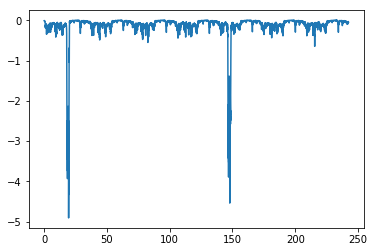

In [97]:
plt.plot(prediction_x,np.log10(prediction_y))